In [121]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import random
import seaborn as sns


In [122]:
avocado_df = pd.read_csv('drive/MyDrive/avocado.csv')
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [123]:
avocado_df.region.value_counts()

StLouis                338
Atlanta                338
SouthCentral           338
Orlando                338
Chicago                338
Indianapolis           338
Tampa                  338
Southeast              338
Charlotte              338
GrandRapids            338
MiamiFtLauderdale      338
California             338
LasVegas               338
Boston                 338
Albany                 338
Syracuse               338
RaleighGreensboro      338
Boise                  338
Houston                338
NewYork                338
Detroit                338
Pittsburgh             338
LosAngeles             338
Portland               338
Spokane                338
BuffaloRochester       338
Seattle                338
Plains                 338
Philadelphia           338
Nashville              338
Northeast              338
TotalUS                338
CincinnatiDayton       338
PhoenixTucson          338
SanDiego               338
SouthCarolina          338
NorthernNewEngland     338
S

In [124]:
avocado_df['XLarge Bags'].value_counts()

0.00        12048
3.33           29
6.67           16
1.11           15
5.00           12
            ...  
36.39           1
29342.75        1
724.83          1
7415.42         1
118.86          1
Name: XLarge Bags, Length: 5588, dtype: int64

In [125]:
avocado_df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [126]:
df=avocado_df[['Date', 'AveragePrice','Total Volume']]

In [127]:
df['sale']=df['AveragePrice']*df['Total Volume']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [129]:
df

,Date,AveragePrice,Total Volume,sale
0,2015-12-27,1.33,64236.62,85434.7046
1,2015-12-20,1.35,54876.98,74083.9230
2,2015-12-13,0.93,118220.22,109944.8046
3,2015-12-06,1.08,78992.15,85311.5220
4,2015-11-29,1.28,51039.60,65330.6880
...,...,...,...,...
18244,2018-02-04,1.63,17074.83,27831.9729
18245,2018-01-28,1.71,13888.04,23748.5484
18246,2018-01-21,1.87,13766.76,25743.8412
18247,2018-01-14,1.93,16205.22,31276.0746


In [130]:
df=df.sort_values('Date')

In [101]:
df.isnull().any()

Date            False
AveragePrice    False
Total Volume    False
dtype: bool

In [134]:
df.Date=pd.to_datetime(df.Date,format='%Y/%m/%d')

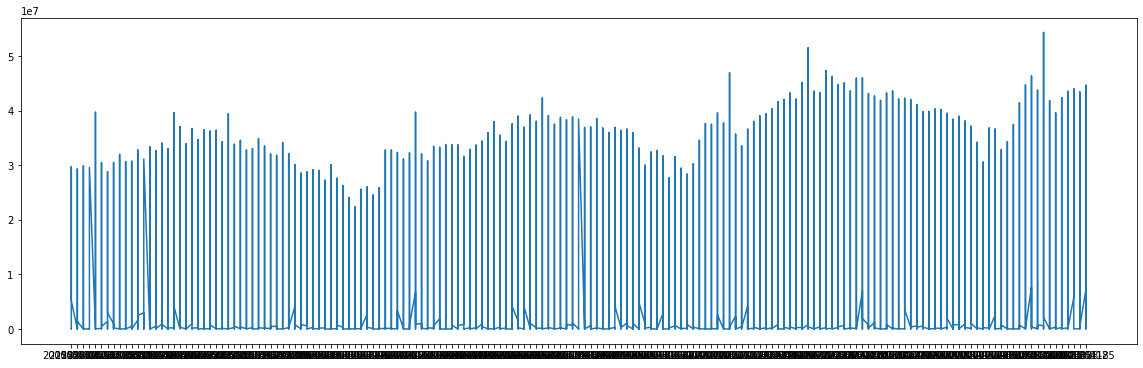

In [131]:
plt.figure(figsize=(20,6))
plt.plot(df['Date'], df['sale'])

In [137]:
df.index=pd.DatetimeIndex(df.Date)

In [141]:
df_sale=df[['Date','sale']]

Text(0, 0.5, 'sale')

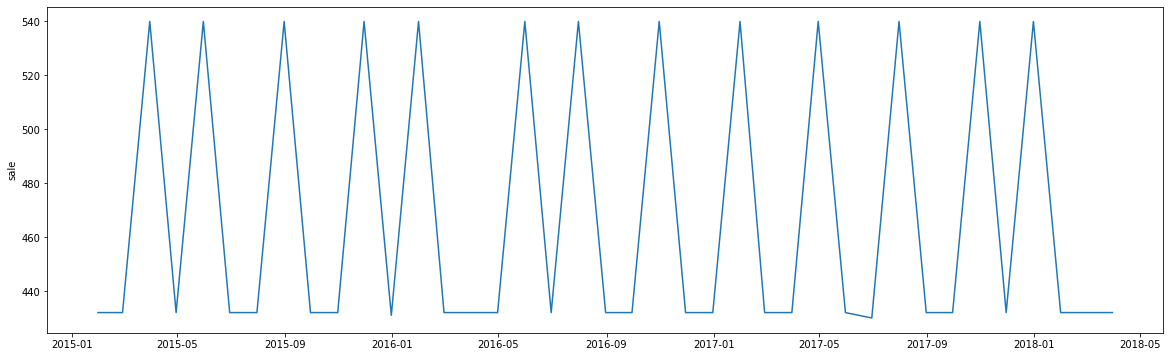

In [143]:
plt.figure(figsize=(20,6))
plt.plot(df_sale.resample('M').size())
plt.ylabel('sale')

<Figure size 1440x432 with 0 Axes>

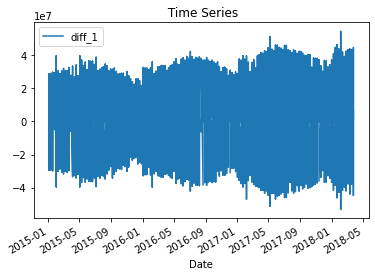

In [144]:
df['diff_1'] = df.sale - df.sale.shift()
plt.figure(figsize=(20,6))
df.plot(y='diff_1')
plt.title(' Time Series')
plt.show()

Text(0.5, 1.0, 'PACF')

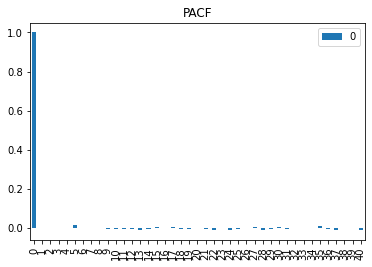

In [145]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(df.sale))
x_acf.plot(kind='bar')
plt.title("PACF")

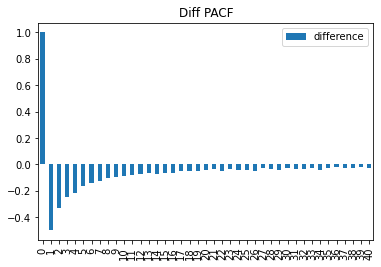

In [146]:
x_acf = pd.DataFrame(pacf(df.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("Diff PACF")
plt.legend(['difference'])

Initial time series and the differences seem to show no real autocorrelation

#Building ARIMA models

In [147]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.sale, order=(0,1,0))
model_fit_010 = model.fit()
print(model_fit_010.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.sale   No. Observations:                18248
Model:                 ARIMA(0, 1, 0)   Log Likelihood             -308150.143
Method:                           css   S.D. of innovations        5219182.950
Date:                Tue, 16 Nov 2021   AIC                         616304.286
Time:                        03:21:21   BIC                         616319.910
Sample:                             1   HQIC                        616309.421
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        127.7022   3.86e+04      0.003      0.997   -7.56e+04    7.59e+04


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [148]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.sale, order=(1,0,0))
model_fit_100 = model.fit()
print(model_fit_100.summary())

                              ARMA Model Results                              
Dep. Variable:                   sale   No. Observations:                18249
Model:                     ARMA(1, 0)   Log Likelihood             -301819.732
Method:                       css-mle   S.D. of innovations        3685936.568
Date:                Tue, 16 Nov 2021   AIC                         603645.464
Time:                        03:21:35   BIC                         603668.899
Sample:                             0   HQIC                        603653.165
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.279e+05   2.72e+04     34.092      0.000    8.75e+05    9.81e+05
ar.L1.sale    -0.0024      0.007     -0.329      0.742      -0.017       0.012
                                    Roots           

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [149]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.sale, order=(0,0,1))
model_fit_001 = model.fit()
print(model_fit_001.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                   sale   No. Observations:                18249
Model:                     ARMA(0, 1)   Log Likelihood             -301819.731
Method:                       css-mle   S.D. of innovations        3685936.493
Date:                Tue, 16 Nov 2021   AIC                         603645.463
Time:                        03:21:48   BIC                         603668.898
Sample:                             0   HQIC                        603653.164
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.279e+05   2.72e+04     34.093      0.000    8.75e+05    9.81e+05
ma.L1.sale    -0.0025      0.007     -0.330      0.742      -0.017       0.012
                                    Roots           

In [154]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.sale, order=(1,1,1))
model_fit_111 = model.fit()
print(model_fit_111.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.sale   No. Observations:                18248
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -301801.726
Method:                       css-mle   S.D. of innovations        3684720.006
Date:                Tue, 16 Nov 2021   AIC                         603611.452
Time:                        03:36:12   BIC                         603642.699
Sample:                             1   HQIC                        603621.721
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           19.3809      5.332      3.635      0.000       8.930      29.831
ar.L1.D.sale    -0.0028      0.007     -0.382      0.703      -0.017       0.012
ma.L1.D.sale    -1.0000      0.000  -5837.34

In [151]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.sale, order=(3,1,3))
model_fit_111 = model.fit()
print(model_fit_111.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.sale   No. Observations:                18248
Model:                 ARIMA(3, 1, 3)   Log Likelihood             -301808.414
Method:                       css-mle   S.D. of innovations        3686041.652
Date:                Tue, 16 Nov 2021   AIC                         603632.828
Time:                        03:29:29   BIC                         603695.323
Sample:                             1   HQIC                        603653.366
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          125.2241        nan        nan        nan         nan         nan
ar.L1.D.sale    -1.6576      0.007   -238.472      0.000      -1.671      -1.644
ar.L2.D.sale    -1.0046      0.012    -87.32

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


ARIMA(1,1,1), the constant is 19.3809 . Then, each day is approximately equal to -353.7194 time the previous day's value; this is explained through the AR(1) coefficient being -353.7194. The moving average term is 1 ; this means that the error present in the model, each day is approximately equal to the previous day's error. 